<a href="https://colab.research.google.com/github/witkov/chi-squared/blob/master/Generic_chi2_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generic_chi2_2D.ipynb version 1/8/22
# This script does chi-square curve fitting to the 1-parameter linear model y = Ax
#
# Three arrays are needed:
    # x is an array of mean values for the independent variable
    # y is an array of mean values for the dependent variable
    # y_err is an array of standard errors (SD/(sqrt of N)) for y
#
# This script assumes errors on the dependent (y) variable only.
#
# SOFTWARE DEPENDENCIES: Numpy, Matplotlib
# ---------------------------------------------------------------------------
# Copyright (C) 2021 Carey Witkov and Keith Zengel

# This program is free software: you can redistribute it and/or modify it under 
# the terms of the GNU General Public License as published by the Free Software 
# Foundation; either version 3 of the License, or (at your option) any later version.

# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; 
# without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. 
# See the GNU General Public License for more details.

# You should have received a copy of the GNU General Public License along with this program. 
# If not, see https://www.gnu.org/licenses/.
# ---------------------------------------------------------------------------

Run the section below to import all the necessary python 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
%pylab inline
 
# this sets the figure format to a vector format
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', quality=50)

Populating the interactive namespace from numpy and matplotlib


Enter your data below

   5 points   chisq min = 17.67   
 best slope =   0.49 +/- 0.03 
 best intercept =   0.16 +/- 0.03


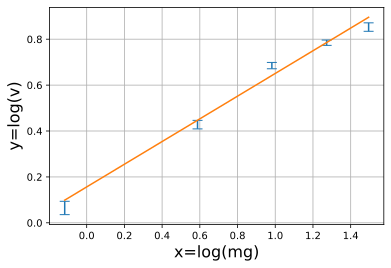

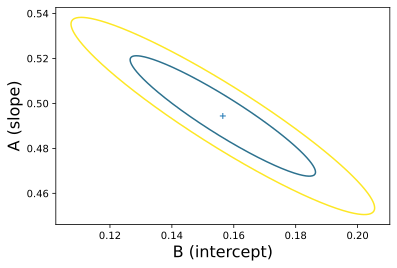

In [4]:
# It is assumed that experimental variation is in the dependent, not the independent, variable.
# Therefore, enter either a single measurement or a mean for each independent variable value)
x1 = 0.89
x2 = 1.80
x3 = 2.67
x4 = 3.57
x5 = 4.46
x = np.array([x1, x2, x3, x4, x5])

# Dependent variable
# Enter repeated measurements of the dependent variable.
y1 = np.array([1.150, 1.026, 1.014, 1.134, 1.010])
y2 = np.array([1.443, 1.492, 1.583, 1.563, 1.589])
y3 = np.array([2.031, 1.939, 1.941, 2.067, 1.941])
y4 = np.array([2.181, 2.202, 2.199, 2.109, 2.269])
y5 = np.array([2.507, 2.292, 2.303, 2.364, 2.267])
 
################################################################
############## DO NOT EDIT BELOW THIS LINE #####################
################################################################
 
# Calculate the mean and std dev of each set of 5 velocity measurements.
y_mean = np.array([mean(y1), mean(y2), mean(y3), mean(y4), mean(y5)])
sigma_y=np.array([np.std(y1, ddof=1), np.std(y2, ddof=1), np.std(y3, ddof=1), np.std(y4, ddof=1), np.std(y5, ddof=1)]/np.sqrt(np.size(y1)));
 
# x,y data arrays and y-error array
x = log(x);
y = log(y_mean); 
yerr = sigma_y/y_mean;
 
# calculate sums needed to obtain chi-square
s_yy=sum(y**2/yerr**2)
s_xx=sum(x**2/yerr**2)
s_0=sum(1/yerr**2)
s_xy=sum((y*x)/yerr**2)
s_y=sum(y/yerr**2)
s_x=sum(x/yerr**2)
 
A_best = (s_0*s_xy - s_x*s_y)/(s_0*s_xx - s_x**2)
sigma_A = 1/sqrt(s_xx);
B_best = (s_y*s_xx - s_x*s_xy)/(s_0*s_xx - s_x**2)
sigma_B = 1/sqrt(s_0);
rho = s_x/sqrt(s_xx*s_0);
minchi2 = (s_0*s_xy**2 - 2*s_x*s_y*s_xy + s_y**2*s_xx)/(s_x**2 - s_0*s_xx) + s_yy
 
A_delta = sqrt(2.3*sigma_A**2/(1-rho**2));
B_delta = sqrt(2.3*sigma_B**2/(1-rho**2));
 
# plot data with errorbars 
#plt.figure()
plt.figure(facecolor='white')
plt.errorbar(x,y,yerr,linestyle='None',fmt='none',capsize=5)
plt.xlabel('x=log(mg)',fontsize=16)
plt.ylabel('y=log(v)',fontsize=16)
plt.grid(True)
#plt.title('y vs x data and line-of-best-fit', fontsize=16)
plt.plot(x,A_best*x+B_best);
 
 
# create parameter grid
A_interval = sqrt(6.17*sigma_A**2/(1-rho**2));
B_interval = sqrt(6.17*sigma_B**2/(1-rho**2));
a = np.linspace(A_best-1.1*A_interval,A_best+1.1*A_interval,500)
b = np.linspace(B_best-1.1*B_interval,B_best+1.1*B_interval,500)
A,B = np.meshgrid(a,b)
 
# calculate chi-square over parameter grid
chi2=(s_yy) + (A**2)*(s_xx) + (B**2)*(s_0) - 2*A*s_xy - 2*B*s_y + 2*A*B*s_x
 
# plot chi-square in A-b parameter plane with 68% and 95% contours
#plt.figure()
plt.figure(facecolor='white')
levels=[minchi2,minchi2+2.3,minchi2+6.17]
Z=plt.contour(B,A,chi2,levels)
plt.xlim(np.min(b),np.max(b))
plt.ylim(np.min(a),np.max(a))
plt.plot(B_best,A_best,'+')
plt.ylabel('A (slope)',fontsize=16)
plt.xlabel('B (intercept)',fontsize=16)
#plt.title('Chi-square 68%% and 95%% contours in A-B plane \n %d pts chisq min=%4.2f Abest=%4.2f Bbest=%4.2f' %(x.size,minchi2,Abest,Bbest));
print("%4d points   chisq min =%6.2f   \n best slope =%7.2f +/- %.2f \n best intercept =%7.2f +/- %.2f" %(x.size,minchi2,A_best,A_delta,B_best,B_delta))